# Türkiye için Küresel Enerji Değerlendirmesi

## Bölüm 7 - Gelecek


Barış Sanlı, barissanli2@gmail.com

Enerji verileri için https://www.energyinst.org/statistical-review/resources-and-data-downloads (Narrow - CSV Format) indirin

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'
#!pip install joypy #for ridgeline

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [4]:
import pandas as pd

In [5]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [6]:
ulkeler=["Turkiye","Total World","Total EU","Total OECD","China","Germany","Total Non-OECD"]
#İtalya ve Meksika, GDP olarak yakın
#İran ve Almanya, nüfus olaarak yakın
ilkyil=1965

In [7]:
#df.Var.unique()

In [8]:
degiskenler=["pop", "GDP","primary_ej","primary_eintensity","elect_twh", "renewables_ej", "ren_power_twh","solar_twh","wind_twh",
             "co2_mtco2","hydro_twh", "coalcons_ej","gascons_ej","oilcons_ej",'electbyfuel_coal','electbyfuel_gas']
            

In [9]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [10]:
ds=df[df.Country.isin(ulkeler) & (df.Year>ilkyil) & df.Var.isin(degiskenler)]

In [11]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [12]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [13]:
for i in degiskenler:
  dt['Dünya_Çin', i] = dt["Total World",i]-dt["China",i]
  dt['Dünya_Çin_AB', i] = dt["Dünya_Çin",i]-dt["Total EU",i]
  dt['nonEU', i] = dt["Total World",i]-dt["Total EU",i]

In [14]:
liste=dt.columns.get_level_values(0).unique().tolist()
liste

['China',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'Turkiye',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

In [15]:
yazilar=['Çin','Almanya','AB','OECD Dışı','OECD','Dünya','Türkiye','Çin Dışındakiler','Çin ve AB Dışındakiler','AB Dışındakiler']
tercume = {liste[i]: yazilar[i] for i in range(len(liste))}


# Stil

In [16]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-white')


#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

# Sorular

In [17]:
#plt.style.available

In [18]:
liste=dt.columns.get_level_values(0).unique().tolist()

In [19]:
liste[0],liste[6]=liste[6],liste[0] # Türkiye Başta olsun

In [20]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

In [21]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

In [22]:
dtdf=dt.diff(1)

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

solar_twh
Turkiye        :   2.54   10 Yıllık :   2.05
Germany        :   3.38   10 Yıllık :   3.06
Total EU       :  26.78   10 Yıllık :  16.38
Total Non-OECD : 127.19   10 Yıllık :  86.83
Total OECD     :  86.18   10 Yıllık :  63.46
Total World    : 213.37   10 Yıllık : 150.30
China          :  81.45   10 Yıllık :  57.58
Dünya_Çin      : 131.92   10 Yıllık :  92.72
Dünya_Çin_AB   : 105.14   10 Yıllık :  76.34
nonEU          : 186.59   10 Yıllık : 133.92


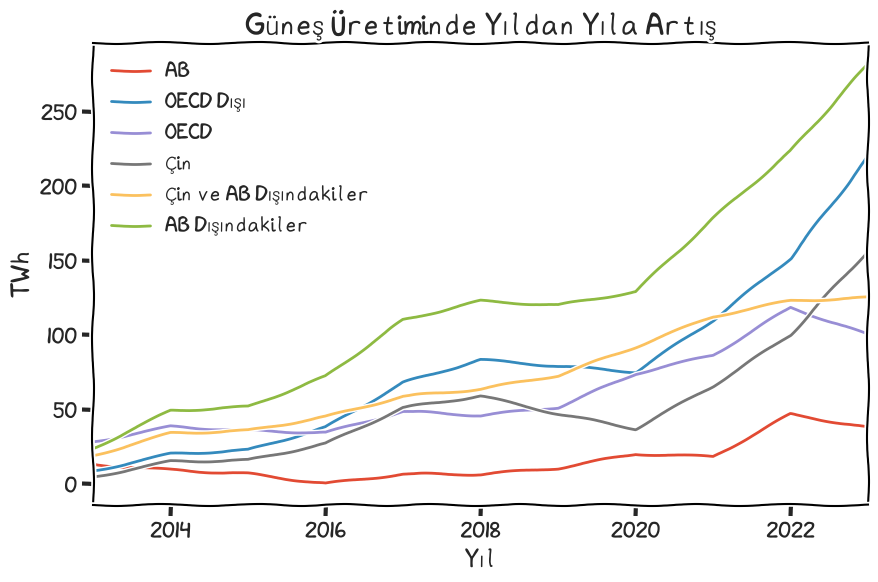

In [24]:

t=7 #solar_twh
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,6,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Güneş Üretiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in liste:
  print(f"{i:14} : {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  10 Yıllık : {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

wind_twh
Turkiye           2.82      2.65
Germany           6.43      8.94
Total EU         31.99     27.09
Total Non-OECD  130.53     98.47
Total OECD       80.44     70.50
Total World     210.97    168.98
China           104.01     74.76
Dünya_Çin       106.95     94.22
Dünya_Çin_AB     74.97     67.12
nonEU           178.98    141.88


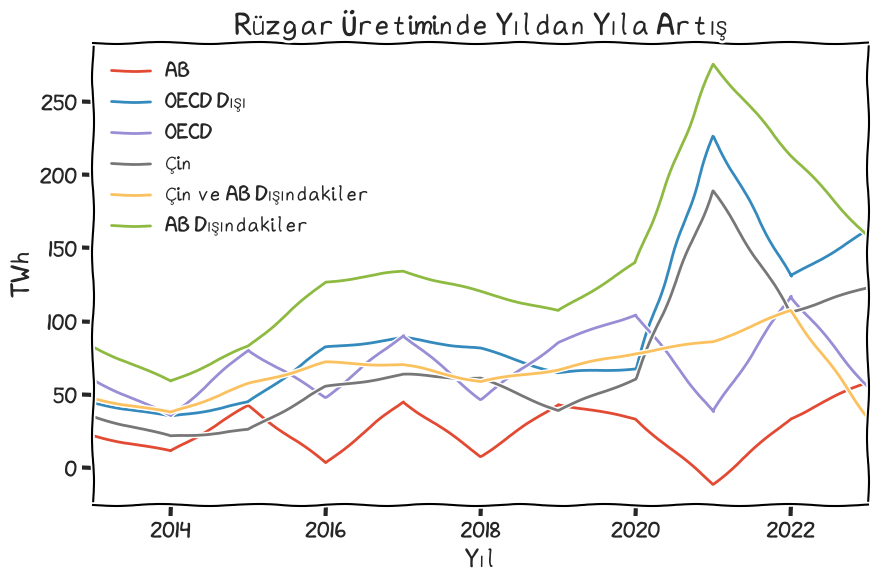

In [25]:

t=8 #wind_twh
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,6,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Rüzgar Üretiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14}  {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"   {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

elect_twh
Turkiye           4.65      8.79
Germany         -25.55    -12.40
Total EU        -39.76    -17.49
Total Non-OECD  667.89    630.18
Total OECD      -39.60     15.35
Total World     628.28    645.53
China           458.06    402.48
Dünya_Çin       170.22    243.05
Dünya_Çin_AB    209.98    260.54
nonEU           668.04    663.02


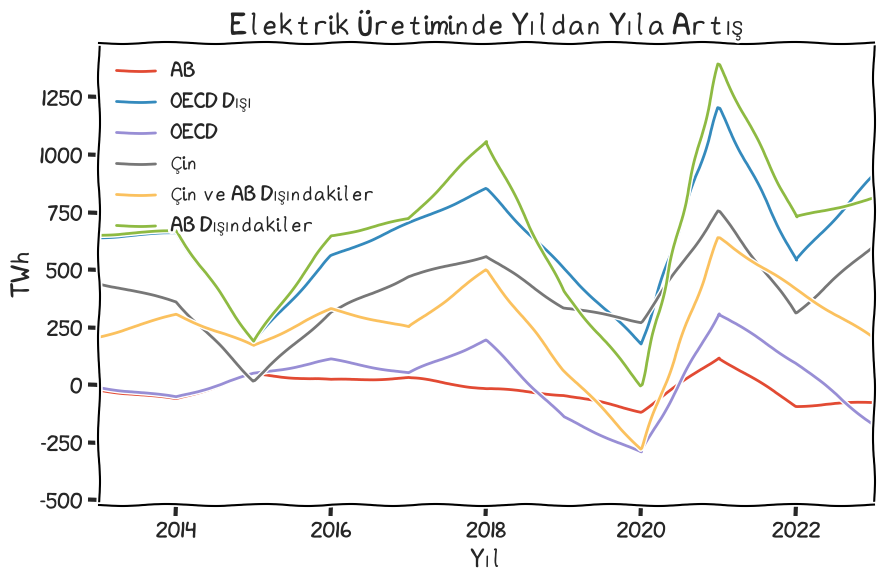

In [26]:

t=4 #elect_twh
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,6,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrik Üretiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

for i in liste:
  print(f"{i:14}  {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"   {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

primary_ej
Turkiye          0.11     0.19
Germany         -0.45    -0.25
Total EU        -1.28    -0.64
Total Non-OECD   9.78     8.71
Total OECD      -2.15    -0.49
Total World      7.63     8.22
China            6.49     4.89
Dünya_Çin        1.14     3.33
Dünya_Çin_AB     2.42     3.96
nonEU            8.91     8.85


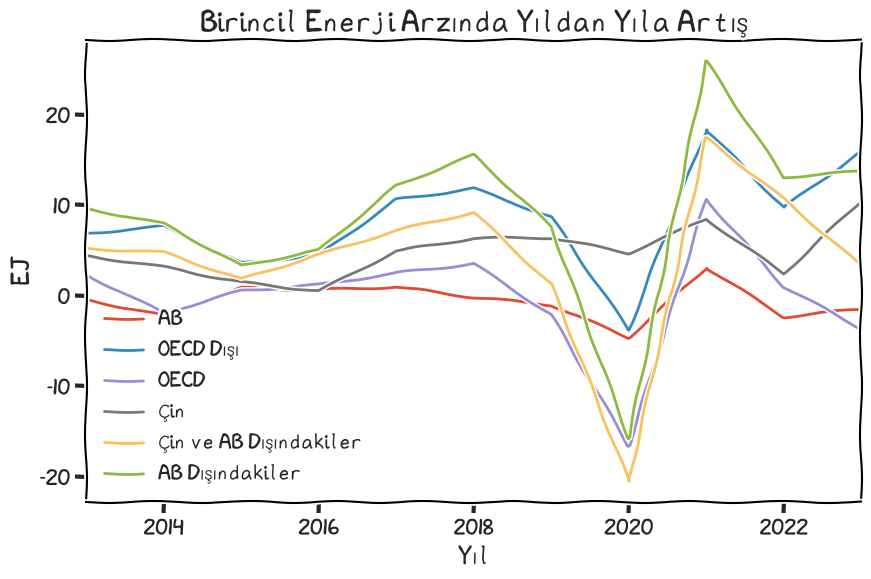

In [27]:

t=2 #primary_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,6,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Birincil Enerji Arzında Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("EJ")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

co2_mtco2
Turkiye          2.05    11.48
Germany        -31.85   -22.56
Total EU       -107.59   -61.57
Total Non-OECD 562.17   462.58
Total OECD     -270.75   -152.06
Total World    291.42   310.51
China          349.40   215.99
Dünya_Çin      -57.98    94.53
Dünya_Çin_AB    49.62   156.09
nonEU          399.02   372.08


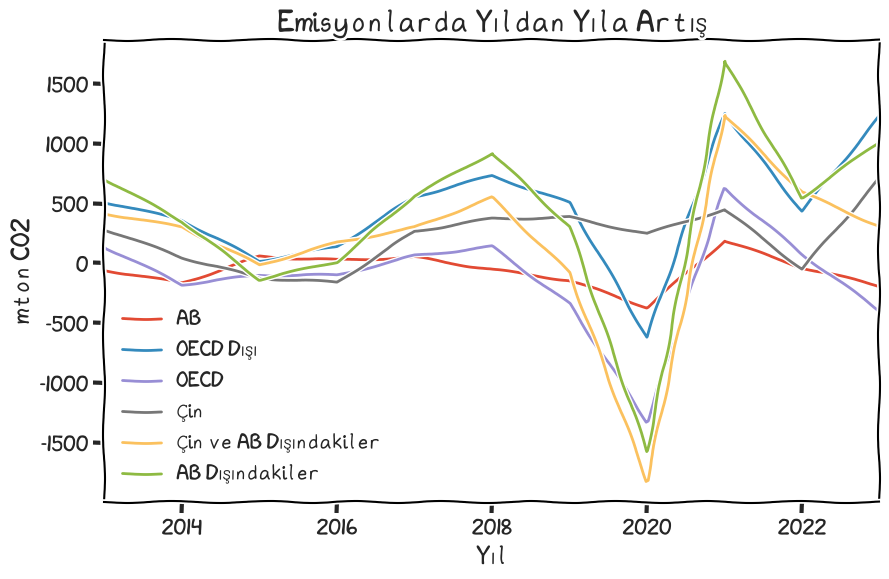

In [28]:
t=9 #primary_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,6, 8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Emisyonlarda Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("mton CO2")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

coalcons_ej
Turkiye         -0.01     0.03
Germany         -0.22    -0.16
Total EU        -0.72    -0.51
Total Non-OECD   3.48     2.16
Total OECD      -2.25    -1.85
Total World      1.23     0.31
China            2.29     0.95
Dünya_Çin       -1.06    -0.64
Dünya_Çin_AB    -0.34    -0.14
nonEU            1.95     0.81


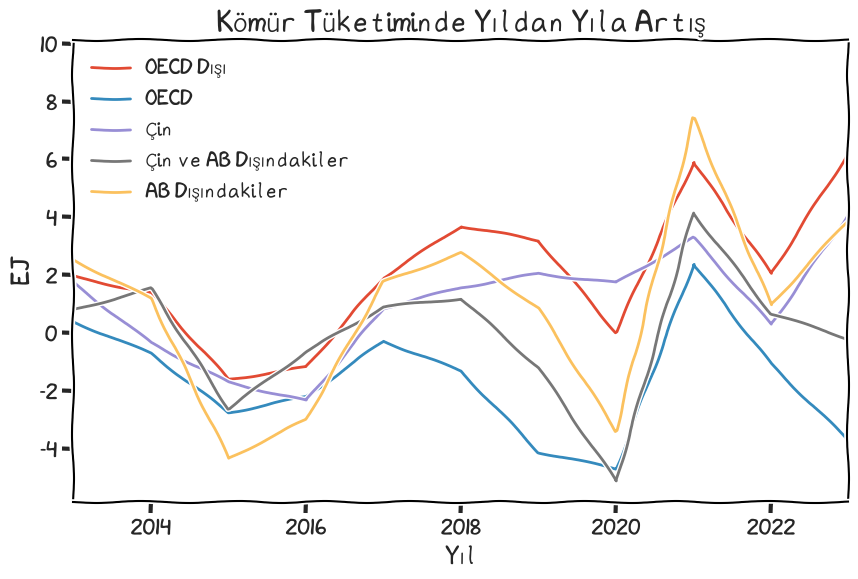

In [29]:
t=11 #primary_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [3,4,6,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Kömür Tüketiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("EJ")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

gascons_ej
Turkiye          0.01     0.02
Germany         -0.07    -0.03
Total EU        -0.43    -0.20
Total Non-OECD   1.37     1.79
Total OECD      -0.09     0.50
Total World      1.28     2.30
China            0.87     0.84
Dünya_Çin        0.41     1.46
Dünya_Çin_AB     0.84     1.66
nonEU            1.71     2.50


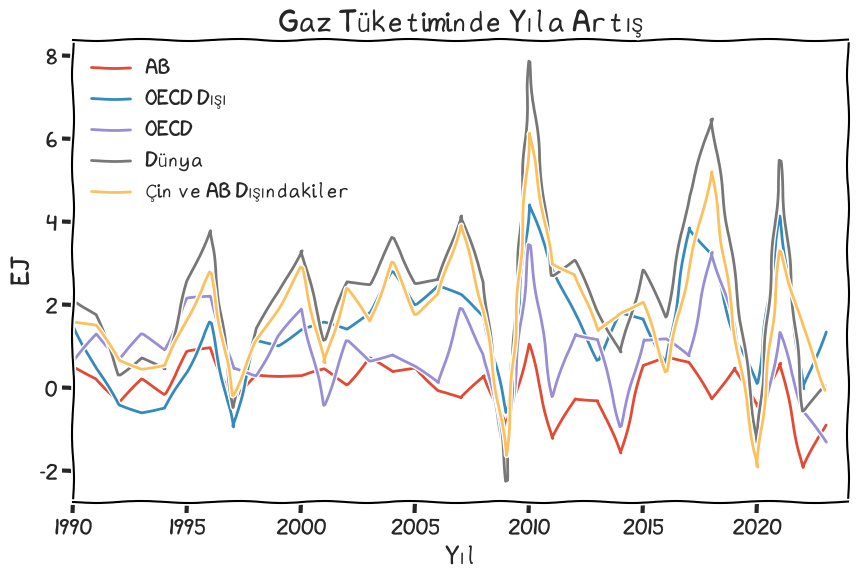

In [30]:
t=12 #gascons_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,5,8]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(1990, 2024)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Gaz Tüketiminde Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("EJ")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

oilcons_ej
Turkiye        :   0.04   10 Yıllık :   0.08
Germany        :  -0.12   10 Yıllık :  -0.08
Total EU       :  -0.36   10 Yıllık :  -0.10
Total Non-OECD :   1.65   10 Yıllık :   1.94
Total OECD     :  -0.90   10 Yıllık :  -0.17
Total World    :   0.75   10 Yıllık :   1.77
China          :   1.12   10 Yıllık :   1.15
Dünya_Çin      :  -0.37   10 Yıllık :   0.62
Dünya_Çin_AB   :  -0.02   10 Yıllık :   0.73
nonEU          :   1.11   10 Yıllık :   1.87


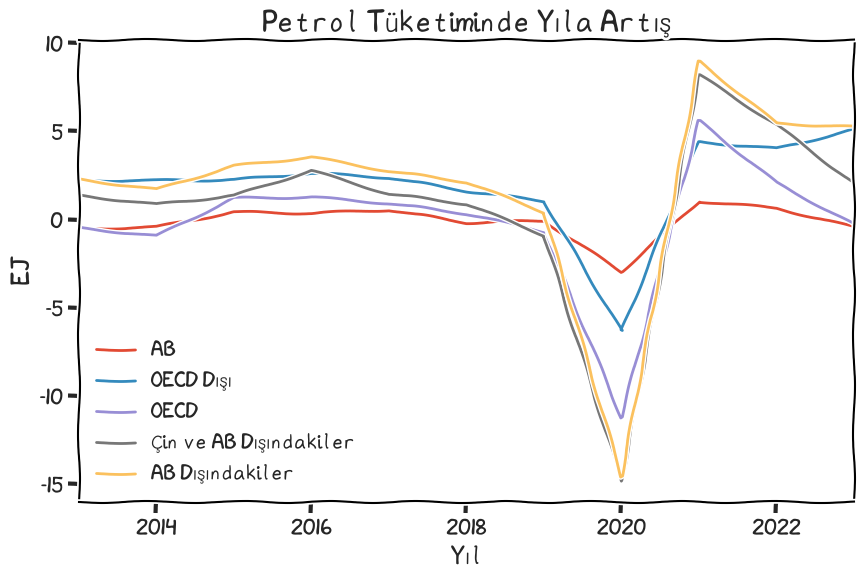

In [31]:
t=13 #oilcons_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(2013, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Petrol Tüketiminde Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("EJ")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:14} : {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  10 Yıllık : {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar

electbyfuel_coal
Turkiye              1.01       5.45
Germany            -20.06     -16.04
Total EU           -56.94     -41.89
Total Non-OECD     267.42     256.66
Total OECD        -190.68    -163.66
Total World         76.74      93.00
China              197.99     167.65
Dünya_Çin         -121.26     -74.65
Dünya_Çin_AB       -64.32     -32.76
nonEU              133.68     134.89


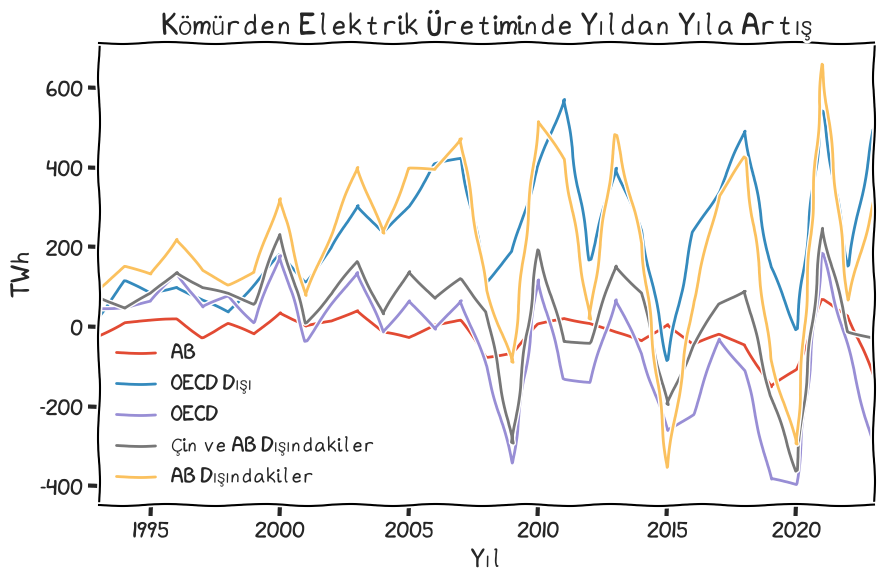

In [32]:
t=14 #oilcons_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]],label=tercume[i])
plt.xlim(1993, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Kömürden Elektrik Üretiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


"""for i in liste:
  print(f"{i:14} : {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:6.2f} "+
       f"  10 Yıllık : {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:6.2f}")  # 5yıllık ve 10 yıllık ortalamalar"""
for i in liste:
  print(f"{i:16} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:8.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:8.2f}")  # 5yıllık ve 10 yıllık ortalamalar

In [33]:
liste

['Turkiye',
 'Germany',
 'Total EU',
 'Total Non-OECD',
 'Total OECD',
 'Total World',
 'China',
 'Dünya_Çin',
 'Dünya_Çin_AB',
 'nonEU']

electbyfuel_gas
Turkiye             -4.56      -3.54
Germany             -0.77       1.07
Total EU            -7.87       3.86
Total Non-OECD      51.76      85.98
Total OECD          37.50      75.02
Total World         89.26     161.00
China               16.46      18.14
Dünya_Çin           72.80     142.86
Dünya_Çin_AB        80.68     139.00
nonEU               97.14     157.14


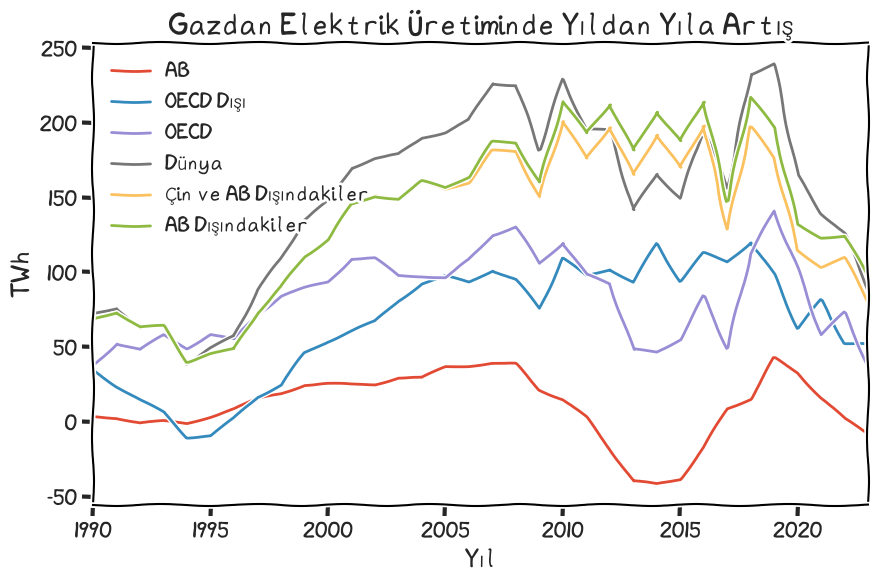

In [34]:
t=15 #oilcons_ej
print(degiskenler[t])

s_liste=[liste[i] for i in [2,3,4,5,8,9]]
#plt.style.use('seaborn-v0_8-white')

#w=dt[('Total World',degiskenler[t])]
#tr=dt[('Turkiye',degiskenler[t])]
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]].rolling(window=5).mean()
             #+dtdf[i,"hydro_twh"].rolling(window=5).mean()
             ,label=tercume[i])
plt.xlim(1990, 2023)
"""
plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")

"""

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Gazdan Elektrik Üretiminde Yıldan Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()


for i in liste:
  print(f"{i:16} {dtdf[i,degiskenler[t]].rolling(window=5).mean().values[-1]:8.2f} "+
       f"  {dtdf[i,degiskenler[t]].rolling(window=10).mean().values[-1]:8.2f}")  # 5yıllık ve 10 yıllık ortalamalar

 Turkiye         : 8.6     13.5
 Germany         : 6.5      6.2
 Total EU        : 41.2     38.5
 Total Non-OECD  : 90.5     63.9
 Total OECD      : 86.2     77.9
 Total World     : 144.3    114.5
 China           : 50.4     11.2
 Dünya_Çin       : 116.1    112.1
 Dünya_Çin_AB    : 105.1    102.8
 nonEU           : 133.0    105.9


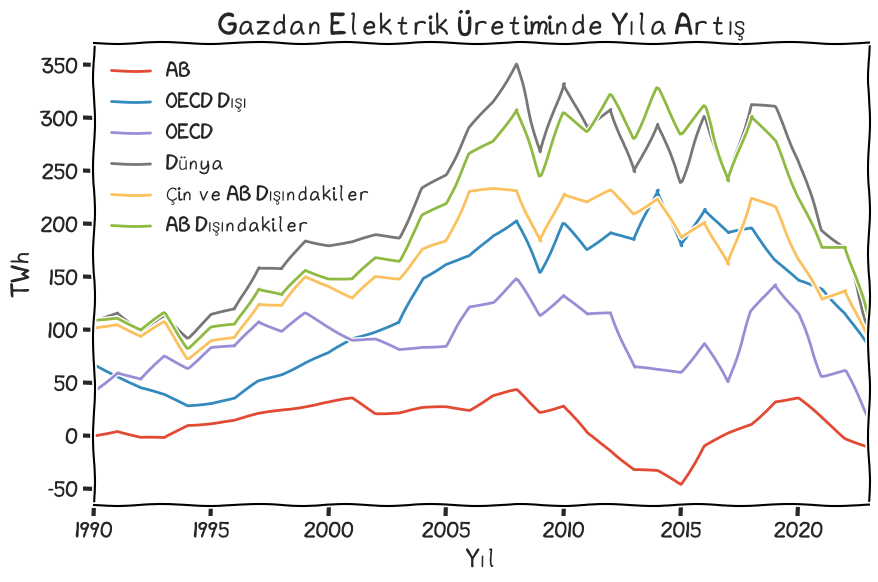

In [35]:
for i in s_liste:
    plt.plot(dtdf[i,degiskenler[t]].rolling(window=5).mean()
             +dtdf[i,"hydro_twh"].rolling(window=5).mean()
             ,label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Gazdan Elektrik Üretiminde Yıla Artış")
plt.xlabel("Yıl")
plt.ylabel("TWh")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(dtdf[i,degiskenler[t]]+dtdf[i,'hydro_twh']).std():2.1f}   {(dtdf[i,degiskenler[t]]).std():6.1f}")

In [36]:
s_liste=[liste[i] for i in [0,2,4,5]]
s_liste

['Turkiye', 'Total EU', 'Total OECD', 'Total World']

In [37]:
t=7
degiskenler[t]

'solar_twh'

In [38]:
[(degiskenler[i],i) for i in range(16)]

[('pop', 0),
 ('GDP', 1),
 ('primary_ej', 2),
 ('primary_eintensity', 3),
 ('elect_twh', 4),
 ('renewables_ej', 5),
 ('ren_power_twh', 6),
 ('solar_twh', 7),
 ('wind_twh', 8),
 ('co2_mtco2', 9),
 ('hydro_twh', 10),
 ('coalcons_ej', 11),
 ('gascons_ej', 12),
 ('oilcons_ej', 13),
 ('electbyfuel_coal', 14),
 ('electbyfuel_gas', 15)]

In [39]:
[(liste[i],i) for i in range(len(liste))]

[('Turkiye', 0),
 ('Germany', 1),
 ('Total EU', 2),
 ('Total Non-OECD', 3),
 ('Total OECD', 4),
 ('Total World', 5),
 ('China', 6),
 ('Dünya_Çin', 7),
 ('Dünya_Çin_AB', 8),
 ('nonEU', 9)]

primary_ej
 Turkiye         : 81.6      2.1
 Germany         : 137.0      1.1
 Total EU        : 125.6      7.7
 Total Non-OECD  : 58.5     98.5
 Total OECD      : 166.0     36.1
 Total World     : 77.0    129.8
 China           : 119.8     50.0
 Dünya_Çin       : 67.8     82.7
 Dünya_Çin_AB    : 63.6     77.0
 nonEU           : 74.1    125.0


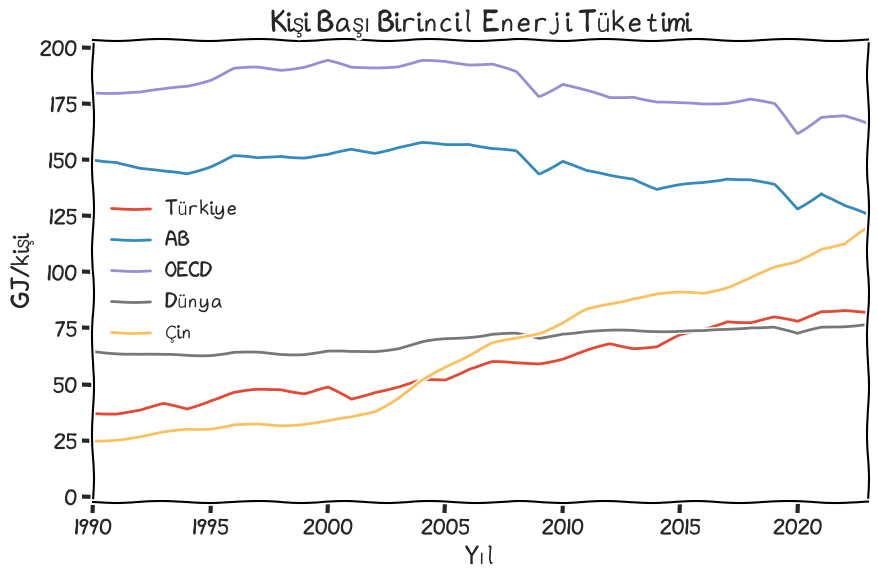

In [40]:
t=2

s_liste=[liste[i] for i in [0,2,4,5,6]]

for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Birincil Enerji Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("GJ/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

oilcons_ej
 Turkiye         : 26.8      0.6
 Germany         : 48.2      0.7
 Total EU        : 47.8      2.8
 Total Non-OECD  : 16.4     25.3
 Total OECD      : 62.9     10.3
 Total World     : 24.4     32.0
 China           : 23.0      9.4
 Dünya_Çin       : 24.7     23.8
 Dünya_Çin_AB    : 23.1     23.1
 nonEU           : 23.0     31.7


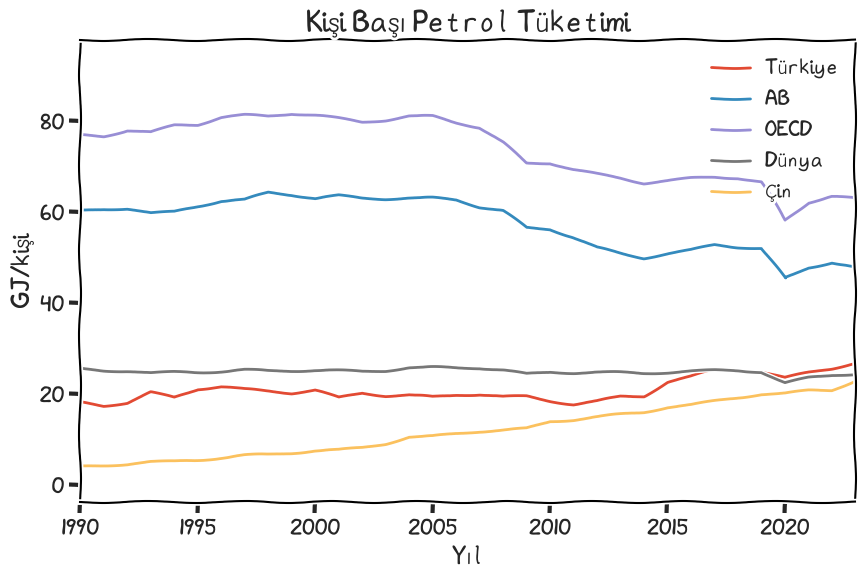

In [41]:
t=13
for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Petrol Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("GJ/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

gascons_ej
 Turkiye         : 20.3      0.7
 Germany         : 32.7      0.9
 Total EU        : 25.6      3.8
 Total Non-OECD  : 12.2     22.1
 Total OECD      : 45.7     13.6
 Total World     : 17.9     35.5
 China           : 10.2      4.0
 Dünya_Çin       : 19.6     32.1
 Dünya_Çin_AB    : 19.2     28.8
 nonEU           : 17.5     32.3


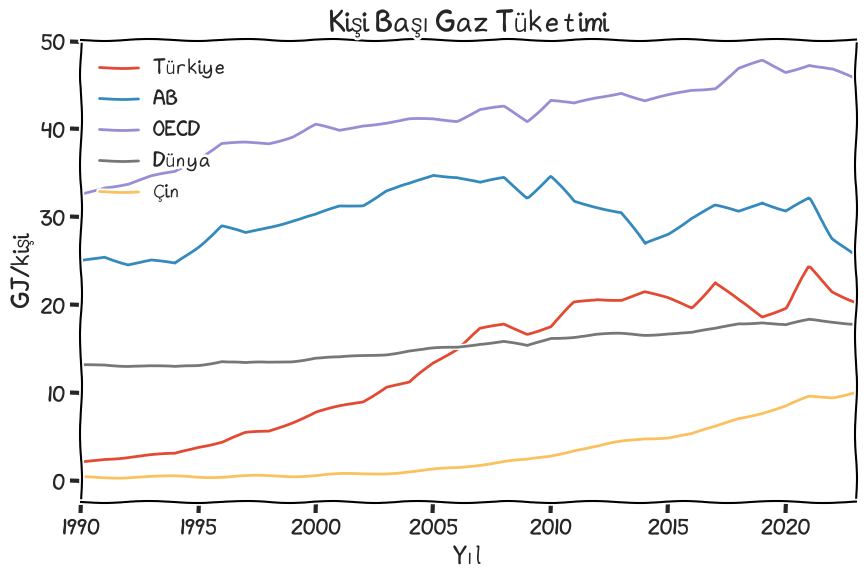

In [42]:
t=12
for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Gaz Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("GJ/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

coalcons_ej
 Turkiye         : 19.2      0.5
 Germany         : 21.9      1.4
 Total EU        : 12.2      3.4
 Total Non-OECD  : 20.9     36.9
 Total OECD      : 18.2      5.7
 Total World     : 20.4     36.6
 China           : 64.5     29.6
 Dünya_Çin       : 10.9      8.2
 Dünya_Çin_AB    : 10.8     10.5
 nonEU           : 20.9     39.6


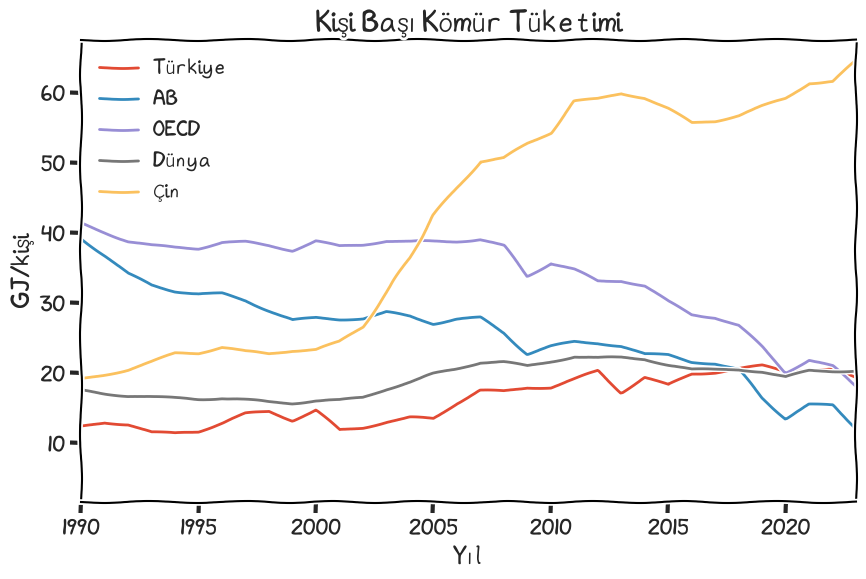

In [43]:
t=11
for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Kömür Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("GJ/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

In [44]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'elect_twh',
 'renewables_ej',
 'ren_power_twh',
 'solar_twh',
 'wind_twh',
 'co2_mtco2',
 'hydro_twh',
 'coalcons_ej',
 'gascons_ej',
 'oilcons_ej',
 'electbyfuel_coal',
 'electbyfuel_gas']

elect_twh
 Turkiye         : 3822.7     96.6
 Germany         : 6167.1     44.1
 Total EU        : 6097.4    302.3
 Total Non-OECD  : 2814.6   4778.5
 Total OECD      : 8072.3   1526.4
 Total World     : 3719.6   6090.2
 China           : 6633.0   2808.5
 Dünya_Çin       : 3092.1   3375.4
 Dünya_Çin_AB    : 2873.5   3109.9
 nonEU           : 3579.1   5848.7


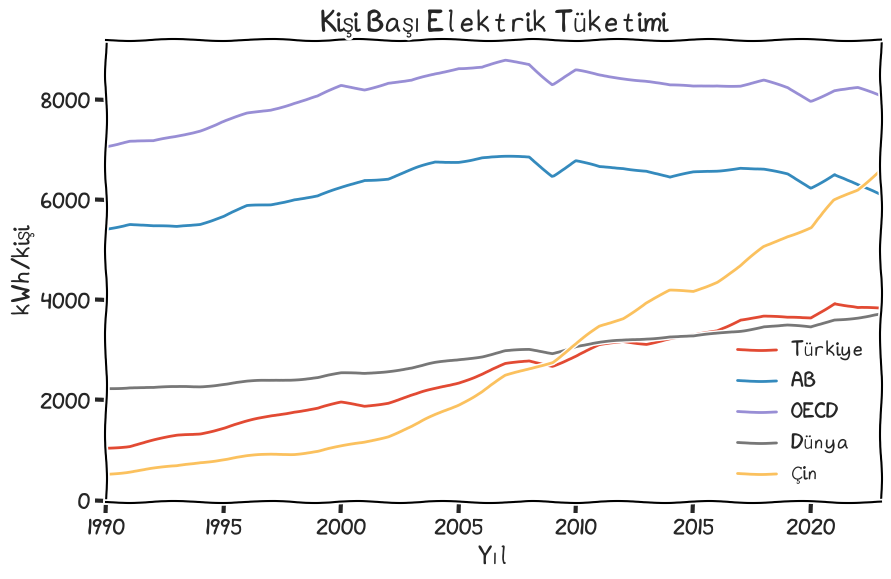

In [45]:
t=4
for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Elektrik Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("kWh/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

solar_twh
 Turkiye         : 239.1      4.3
 Germany         : 734.9     21.1
 Total EU        : 550.6     57.4
 Total Non-OECD  : 133.1    171.1
 Total OECD      : 545.4    169.4
 Total World     : 204.0    337.9
 China           : 409.7    116.4
 Dünya_Çin       : 159.7    236.0
 Dünya_Çin_AB    : 131.3    179.2
 nonEU           : 183.6    283.7


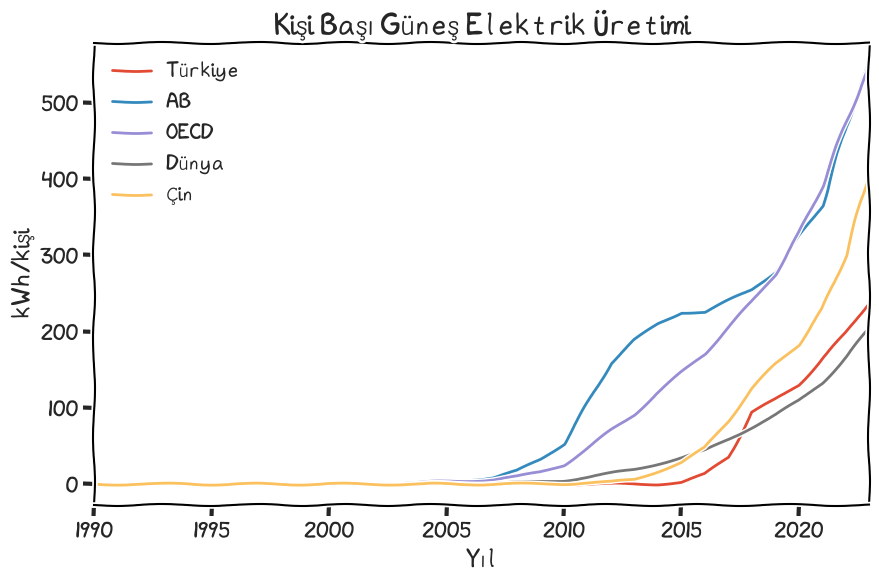

In [46]:
t=7
for i in s_liste:
    plt.plot(1000*dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Güneş Elektrik Üretimi")
plt.xlabel("Yıl")
plt.ylabel("kWh/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {(1000*(dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")

co2_mtco2
 Turkiye         : 5.3    106.1
 Germany         : 7.1    102.8
 Total EU        : 5.9    356.1
 Total Non-OECD  : 4.3   5900.7
 Total OECD      : 8.7    715.5
 Total World     : 5.0   5873.2
 China           : 8.8   3469.2
 Dünya_Çin       : 4.2   2453.1
 Dünya_Çin_AB    : 4.1   2719.1
 nonEU           : 5.0   6159.3


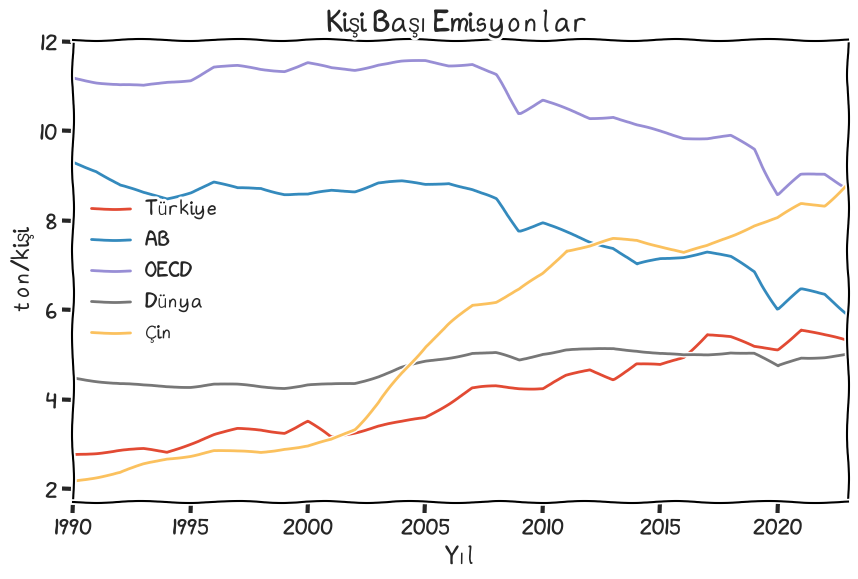

In [48]:
t=9
for i in s_liste:
    plt.plot(dt[i,degiskenler[t]]/dt[i,degiskenler[0]],label=tercume[i])
plt.xlim(1990, 2023)

plt.title("Kişi Başı Emisyonlar ")
plt.xlabel("Yıl")
plt.ylabel("ton/kişi")
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()

print(degiskenler[t])
#standard sapma, gazlı ve gaz+hidro
for i in liste:
 print(f" {i:15} : {((dt[i,degiskenler[t]]/dt[i,degiskenler[0]])).values[-1]:2.1f}   {(dt[i,degiskenler[t]]).std():6.1f}")